In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxopt # convex optimisation module
import SVM as SVM_module
import my_statistics as ms

### Hyperplane in 2D space

In [2]:
X_1, X_2 = np.linspace(-1.5, 1.5, 18), np.linspace(-1.5, 1.5, 18)
X_1_=np.einsum('i,ij->ij',X_1,np.ones((len(X_1),len(X_2))))
X_2_=np.einsum('j,ij->ij',X_2,np.ones((len(X_2),len(X_1))))
values = 1 + 2* X_1_ + 3* X_2_

In [3]:
X_1_gr, X_2_gr = X_1[np.argwhere(values>0)[:,0]], X_2[np.argwhere(values>0)[:,1]]
X_1_le, X_2_le = X_1[np.argwhere(values<0)[:,0]], X_2[np.argwhere(values<0)[:,1]]

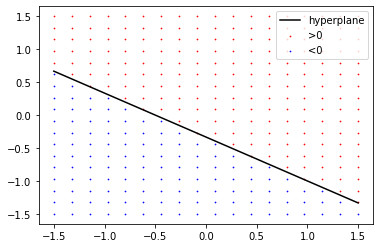

In [4]:
plt.scatter(X_1_gr,X_2_gr, c='r', s=.5, label='>0')
plt.scatter(X_1_le,X_2_le, c='b', s=.5, label='<0')
plt.plot(X_1, -1/3-2/3*X_1, c='k', label='hyperplane')
plt.legend();

### Maximal margin classifier

#### Determination of Lagrange multipliers $\alpha_i$ through Quadratic Programming (QP) optimization

Expected problem formulation for QP:
\begin{equation}
\min \frac{1}{2}\vec{x}^TP\vec{x} + \vec{q}^T\vec{x} ;\quad A\vec{x}=b,\quad G\vec{x} \leq h
\end{equation}

Our formulation:
\begin{equation}
\min \frac{1}{2}\vec{\alpha}^TH\vec{\alpha} - \vec{1}^T\vec{\alpha} ;\quad y^T\vec{\alpha}=0,\quad -\alpha_i \leq 0 \forall i
\end{equation}

#### Scikit-learn's Iris dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
# Retain only 2 linearly separable classes
iris_df = iris_df[iris_df["target"].isin([0,1])]
iris_df["target"] = iris_df[["target"]].replace(0,-1)
# Select only 2 attributes
iris_df = iris_df[["petal length (cm)", "petal width (cm)", "target"]]
iris_df.head(1)

,petal length (cm),petal width (cm),target
0,1.4,0.2,-1.0


In [6]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()

In [7]:
w, b, M = SVM_module.SVM(X,y, S_=2)

     pcost       dcost       gap    pres   dres
 0: -5.8693e+00 -1.1241e+01  3e+02  1e+01  2e+00
 1: -5.9277e+00 -3.6988e+00  4e+01  2e+00  3e-01
 2: -1.0647e+00 -1.9434e+00  5e+00  2e-01  2e-02
 3: -6.5979e-01 -1.1956e+00  6e-01  6e-03  8e-04
 4: -8.3813e-01 -1.2988e+00  5e-01  3e-03  4e-04
 5: -1.1588e+00 -1.1784e+00  2e-02  8e-05  1e-05
 6: -1.1763e+00 -1.1765e+00  2e-04  8e-07  1e-07
 7: -1.1765e+00 -1.1765e+00  2e-06  8e-09  1e-09
 8: -1.1765e+00 -1.1765e+00  2e-08  8e-11  1e-11
Optimal solution found.


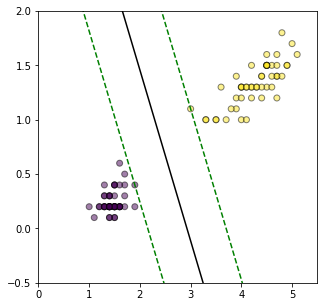

In [8]:
x_min=0
x_max=5.5
plt.figure(figsize=(5,5))
plt.xlim(x_min,x_max)
plt.ylim(-.5,2)
x1_values = np.linspace(x_min,x_max,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, edgecolors="black")
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )

#### Random data divided into groups on the basis of ref_plane function parameters

In [9]:
def ref_plane(X,Y):
    return 1 + 2* X + 10* Y

In [10]:
no_of_points = 50
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [11]:
w, b, M = SVM_module.SVM(X, Y[:,np.newaxis], S_=2)

     pcost       dcost       gap    pres   dres
 0: -1.2973e+01 -2.8439e+01  1e+02  1e+01  2e+00
 1: -3.1010e+01 -3.8233e+01  8e+01  5e+00  1e+00
 2: -1.0539e+02 -1.0712e+02  8e+01  5e+00  9e-01
 3: -3.9789e+02 -3.8353e+02  1e+02  4e+00  9e-01
 4: -3.3015e+02 -3.5858e+02  2e+02  4e+00  8e-01
 5: -4.7630e+02 -4.9779e+02  3e+02  2e+00  5e-01
 6: -3.3563e+02 -3.5576e+02  2e+01  8e-14  3e-14
 7: -3.4566e+02 -3.4587e+02  2e-01  8e-14  2e-14
 8: -3.4577e+02 -3.4577e+02  2e-03  1e-13  4e-14
 9: -3.4577e+02 -3.4577e+02  2e-05  1e-13  6e-14
Optimal solution found.


In [12]:
w, b, M

(array([ 4.42727132, 25.92168262]), 3.0412412375588813, 0.038027092211414315)

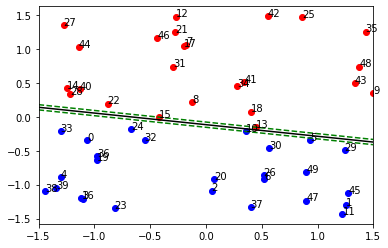

In [13]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )

In [14]:
X_test = np.array([1.5, -0.2])
value = SVM_module.get_SVM_val(X_test, w, b)

In [15]:
value, SVM_module.SVM_predict(X_test[np.newaxis], w, b)

(4.497811688225144, array([1.]))

#### SVM class

In [16]:
from SVM_class import SVM

In [17]:
svm_ = SVM(X, Y[:,np.newaxis])

In [18]:
# generation of sep. plane param
svm_.train()

     pcost       dcost       gap    pres   dres
 0: -1.2973e+01 -2.8439e+01  1e+02  1e+01  2e+00
 1: -3.1010e+01 -3.8233e+01  8e+01  5e+00  1e+00
 2: -1.0539e+02 -1.0712e+02  8e+01  5e+00  9e-01
 3: -3.9789e+02 -3.8353e+02  1e+02  4e+00  9e-01
 4: -3.3015e+02 -3.5858e+02  2e+02  4e+00  8e-01
 5: -4.7630e+02 -4.9779e+02  3e+02  2e+00  5e-01
 6: -3.3563e+02 -3.5576e+02  2e+01  8e-14  3e-14
 7: -3.4566e+02 -3.4587e+02  2e-01  8e-14  2e-14
 8: -3.4577e+02 -3.4577e+02  2e-03  1e-13  4e-14
 9: -3.4577e+02 -3.4577e+02  2e-05  1e-13  6e-14
Optimal solution found.


In [19]:
# testing data generation
no_of_points_test = 100
X1_test = np.random.random(no_of_points_test)*3 - 1.5
X2_test = np.random.random(no_of_points_test)*3 - 1.5
values_test = ref_plane(X1_test, X2_test)
classes_test = np.where(values_test>0, 1., -1.)
X_test = np.concatenate([X1_test[:,np.newaxis], X2_test[:,np.newaxis]], axis = 1)
Y_test = np.array(classes_test, dtype=float)

In [20]:
SVM_pred = svm_.predict(X_test)

In [21]:
ms.confusion_matrix(SVM_pred, classes_test, classes=[-1,1], print_=True);

+-------------+------------------------+------------------------+------+
| True status |           No           |          Yes           | Sums |
+-------------+------------------------+------------------------+------+
|  Prediciton |                        |                        |      |
|      No     |         TN = 44        |         FN = 0         |  44  |
|     Yes     |         FP = 0         |         TP = 56        |  56  |
|             | specificity = 100.00 % | sensitivity = 100.00 % |      |
|     Sums    |           44           |           56           | 100  |
+-------------+------------------------+------------------------+------+


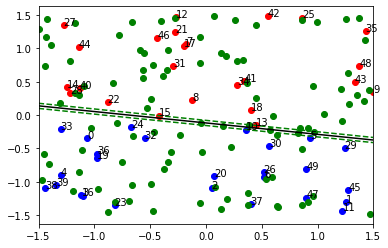

In [22]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*svm_.w[0]- svm_.b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )
plt.scatter(X_test[:,0], X_test[:,1], c='green')

### SVM with Scikit-learn

In [23]:
from sklearn import svm

In [24]:
svm_cl = svm.SVC(kernel='linear')

In [25]:
svm_cl.fit(X[1::2], Y[1::2]);

In [26]:
Y_pred = svm_cl.predict(X[::2])

In [27]:
Y_pred_color = np.where(Y_pred==1, 'r', 'b')

### Support Vector Classifier - Soft Margin SVM

In [28]:
def train_soft_M(X, y, C, S_=2):
    """
    function determine SVM separation hyperplane parameters w and b
    Args:
        X: training predictor data
        y: training reference output data
        S_: ?

    Returns: w, bias b, margin M

    """
    n = X.shape[0]
    H = np.dot(y*X, (y*X).T)
    q = np.repeat([-1.0], n)[..., None]
    A = y.reshape(1, -1)
    b = 0.0
    if (C is not None) and (C != 0):   
        G = np.vstack((np.eye(n)*-1, np.eye(n)))
        h = np.hstack((np.zeros(n), np.ones(n)*C))
    else:
        print("ok")
        G = np.negative(np.eye(n))
        h = np.zeros(n)
    P = cvxopt.matrix(H)
    q = cvxopt.matrix(q)
    G = cvxopt.matrix(G)
    h = cvxopt.matrix(h)
    A = cvxopt.matrix(A)
    b = cvxopt.matrix(b)
    # solution of optimization problem using cvxopt's QP optimization
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol["x"])
    # calculation of w vector
    w = np.dot((y * alphas).T, X)[0]
    # calculation of bias b
    # pomen parametra S!!
    S = np.where(alphas.flatten() > sorted(alphas.flatten())[-S_])
    b = np.mean(y[S] - X[S, :]@w.T)
    # margin calculaton
    M = 1/np.sqrt(sum(w**2))
    return w, b, M, alphas

In [29]:
def ref_plane(X,Y):
    return 1 + 2* X + 10* Y

In [42]:
no_of_points = 150
mixing_level = 1
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
values[abs(values)<mixing_level] = values[abs(values)<mixing_level]*np.sign(np.random.normal())
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [43]:
w, b, M, alphas = train_soft_M(X, Y[:,np.newaxis], C=4)

     pcost       dcost       gap    pres   dres
 0: -9.3381e+01 -1.9523e+03  5e+03  9e-01  4e-15
 1: -5.1082e+01 -6.2997e+02  8e+02  9e-02  3e-15
 2: -3.4119e+01 -1.3334e+02  1e+02  1e-02  7e-15
 3: -5.3211e+01 -8.1417e+01  3e+01  2e-03  4e-15
 4: -5.9604e+01 -6.9871e+01  1e+01  7e-04  3e-15
 5: -6.2275e+01 -6.6354e+01  4e+00  1e-04  2e-15
 6: -6.3618e+01 -6.4847e+01  1e+00  1e-05  3e-15
 7: -6.4141e+01 -6.4174e+01  3e-02  3e-07  3e-15
 8: -6.4155e+01 -6.4156e+01  3e-04  3e-09  4e-15
 9: -6.4156e+01 -6.4156e+01  3e-06  3e-11  3e-15
Optimal solution found.


In [44]:
w, b, M

(array([0.629075  , 5.47325735]), 1.7531133441291176, 0.1815115770471022)

In [45]:
# testing data generation
no_of_points_test = 100
X1_test = np.random.random(no_of_points_test)*3 - 1.5
X2_test = np.random.random(no_of_points_test)*3 - 1.5
values_test = ref_plane(X1_test, X2_test)
classes_test = np.where(values_test>0, 1., -1.)
X_test = np.concatenate([X1_test[:,np.newaxis], X2_test[:,np.newaxis]], axis = 1)
Y_test = np.array(classes_test, dtype=float)

In [46]:
SVM_pred = SVM_module.SVM_predict(X_test, w, b)

In [47]:
ms.confusion_matrix(SVM_pred, classes_test, classes=[-1,1], print_=True);

+-------------+-----------------------+------------------------+------+
| True status |           No          |          Yes           | Sums |
+-------------+-----------------------+------------------------+------+
|  Prediciton |                       |                        |      |
|      No     |         TN = 35       |         FN = 0         |  35  |
|     Yes     |         FP = 11       |         TP = 54        |  65  |
|             | specificity = 76.09 % | sensitivity = 100.00 % |      |
|     Sums    |           35          |           54           | 100  |
+-------------+-----------------------+------------------------+------+


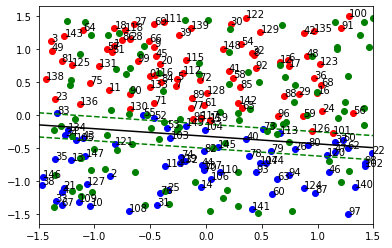

In [48]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )
plt.scatter(X_test[:,0], X_test[:,1], c='green')